In [1]:
import pandas as pd
import keras
import keras.layers
import tensorflow as tf
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE 

In [2]:
ds=pd.read_excel('labelStudent.xlsx')
del ds['Unnamed: 0']
ds

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,0,0,1,1,1,2,2,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,10


In [3]:
XX = ds.drop(['G3'],axis='columns')
X = XX.values
X

array([[ 0,  0, 18, ...,  6,  5,  6],
       [ 0,  0, 17, ...,  4,  5,  5],
       [ 0,  0, 15, ..., 10,  7,  8],
       ...,
       [ 1,  1, 21, ...,  3, 10,  8],
       [ 1,  1, 18, ...,  0, 11, 12],
       [ 1,  1, 19, ...,  5,  8,  9]], dtype=int64)

In [4]:
yy = ds['G3']
y = yy.values
y

array([ 6,  6, 10, 15, 10, 15, 11,  6, 19, 15,  9, 12, 14, 11, 16, 14, 14,
       10,  5, 10, 15, 15, 16, 12,  8,  8, 11, 15, 11, 11, 12, 17, 16, 12,
       15,  6, 18, 15, 11, 13, 11, 12, 18, 11,  9,  6, 11, 20, 14,  7, 13,
       13, 10, 11, 13, 10, 15, 15,  9, 16, 11, 11,  9,  9, 10, 15, 12,  6,
        8, 16, 15, 10,  5, 14, 11, 10, 10, 11, 10,  5, 12, 11,  6, 15, 10,
        8,  6, 14, 10,  7,  8, 18,  6, 10, 14, 10, 15, 10, 14,  8,  5, 17,
       14,  6, 18, 11,  8, 18, 13, 16, 19, 10, 13, 19,  9, 16, 14, 13,  8,
       13, 15, 15, 13, 13,  8, 12, 11,  9,  0, 18,  0,  0, 12, 11,  0,  0,
        0,  0, 12, 15,  0,  9, 11, 13,  0, 11,  0, 11,  0, 10,  0, 14, 10,
        0, 12,  8, 13, 10, 15, 12,  0,  7,  0, 10,  7, 12, 10, 16,  0, 14,
        0, 16, 10,  0,  9,  9, 11,  6,  9, 11,  8, 12, 17,  8, 12, 11, 11,
       15,  9, 10, 13,  9,  8, 10, 14, 15, 16, 10, 18, 10, 16, 10, 10,  6,
       11,  9,  7, 13, 10,  7,  8, 13, 14,  8, 10, 15,  4,  8,  8, 10,  6,
        0, 17, 13, 14,  7

In [5]:
oversample = SMOTE(sampling_strategy={0: 5000})
X, y = oversample.fit_resample(X, y)

C:\Users\OAK\anaconda3\envs\DMenv\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (5000) in class 0 will be larger than the number of samples in the majority class (class #10 -> 56)
  warnings.warn(


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [7]:
model = tf.keras.models.Sequential()  
model.add(tf.keras.layers.Dense(30, activation='relu')) 
model.add(tf.keras.layers.Dense(60, activation='relu'))  
model.add(keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(30, activation='relu'))  
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))  
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history=model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/300
134/134 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9347 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 2/300
134/134 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9358 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 3/300
134/134 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9356 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 4/300
134/134 [==============================] - 0s 985us/step - loss: 0.0000e+00 - accuracy: 0.9356 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 5/300
134/134 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9356 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 6/300
134/134 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9354 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 7/300
134/134 [==============================] - 0s 962us/step - loss: 0.0000e+00 - ac

Epoch 55/300
134/134 [==============================] - 0s 977us/step - loss: 0.0000e+00 - accuracy: 0.9349 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 56/300
134/134 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9349 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 57/300
134/134 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9358 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 58/300
134/134 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9349 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 59/300
134/134 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9351 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 60/300
134/134 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9356 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 61/300
134/134 [==============================] - 0s 980us/step - loss: 0.0000e+

134/134 [==============================] - 0s 992us/step - loss: 0.0000e+00 - accuracy: 0.9356 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 109/300
134/134 [==============================] - 0s 962us/step - loss: 0.0000e+00 - accuracy: 0.9358 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 110/300
134/134 [==============================] - 0s 962us/step - loss: 0.0000e+00 - accuracy: 0.9356 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 111/300
134/134 [==============================] - 0s 962us/step - loss: 0.0000e+00 - accuracy: 0.9349 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 112/300
134/134 [==============================] - 0s 985us/step - loss: 0.0000e+00 - accuracy: 0.9354 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 113/300
134/134 [==============================] - 0s 962us/step - loss: 0.0000e+00 - accuracy: 0.9356 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 114/300
134/134 [==============================] - 0s 947us/step - loss: 0.000

134/134 [==============================] - 0s 972us/step - loss: 0.0000e+00 - accuracy: 0.9307 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 162/300
134/134 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9351 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 163/300
134/134 [==============================] - 0s 977us/step - loss: 0.0000e+00 - accuracy: 0.9349 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 164/300
134/134 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9344 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 165/300
134/134 [==============================] - 0s 962us/step - loss: 0.0000e+00 - accuracy: 0.9356 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 166/300
134/134 [==============================] - 0s 946us/step - loss: 0.0000e+00 - accuracy: 0.9356 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 167/300
134/134 [==============================] - 0s 977us/step - loss: 0.0000e+0

134/134 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9358 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 215/300
134/134 [==============================] - 0s 977us/step - loss: 0.0000e+00 - accuracy: 0.9356 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 216/300
134/134 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9349 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 217/300
134/134 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9358 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 218/300
134/134 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9356 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 219/300
134/134 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9356 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 220/300
134/134 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accu

134/134 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9356 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 268/300
134/134 [==============================] - 0s 1000us/step - loss: 0.0000e+00 - accuracy: 0.9354 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 269/300
134/134 [==============================] - 0s 969us/step - loss: 0.0000e+00 - accuracy: 0.9356 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 270/300
134/134 [==============================] - 0s 970us/step - loss: 0.0000e+00 - accuracy: 0.9356 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 271/300
134/134 [==============================] - 0s 992us/step - loss: 0.0000e+00 - accuracy: 0.9358 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 272/300
134/134 [==============================] - 0s 970us/step - loss: 0.0000e+00 - accuracy: 0.9358 - val_loss: 0.0000e+00 - val_accuracy: 0.9235
Epoch 273/300
134/134 [==============================] - 0s 977us/step - loss: 0.0000

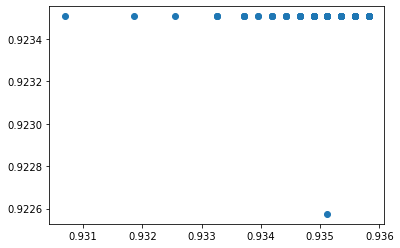

In [15]:
plt.scatter(history.history['accuracy'], history.history['val_accuracy'])
plt.show()

In [16]:
print("NN")
print(metrics.classification_report(y_train, model.predict(X_train))) 

NN
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4010
         1.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         6
         6.0       0.00      0.00      0.00        12
         7.0       0.00      0.00      0.00         6
         8.0       0.00      0.00      0.00        20
         9.0       0.00      0.00      0.00        24
        10.0       0.00      0.00      0.00        46
        11.0       0.00      0.00      0.00        38
        12.0       0.00      0.00      0.00        24
        13.0       0.00      0.00      0.00        21
        14.0       0.00      0.00      0.00        20
        15.0       0.00      0.00      0.00        29
        16.0       0.00      0.00      0.00        11
        17.0       0.00      0.00      0.00         5
        18.0       0.00      0.00      0.00         8
        19.0       0.00 

C:\Users\OAK\anaconda3\envs\DMenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\OAK\anaconda3\envs\DMenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\OAK\anaconda3\envs\DMenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\OAK\anaconda3\envs\DMenv\li